### 국내 시가총액 상위 10개 종목의 2024년도 주가 추이 비교하기

In [12]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [13]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import koreanize_matplotlib

In [15]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', 50) #None으로 설정하면 모든 행 출력

In [16]:
pd.options.display.float_format = '{:,.2f}'.format

In [17]:
import FinanceDataReader as fdr

개별종목 시세 가져오기

#### 1) 종목 정보 가져오기

종목코드, 종목명, 시가총액 정보 가져오기

In [18]:
#CSV 파일 불러오기
df_stocks = pd.read_csv('stocks.csv')

In [19]:
df_stocks.shape

(2856, 23)

In [ ]:
df_stocks.columns

In [21]:
df_stocks.head(1)

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,005930,삼성전자,KOSPI,NaN,53900,2,-100,-0.19,53600,54000,53400,3266678,175331571100,321771279445000,5969782550,STK,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(...",1975-06-11,12월,한종희,http://www.samsung.com/sec,경기도


In [22]:
# 상장일을 문자타입 -> 날짜타입
df_stocks['ListingDate'] = pd.to_datetime(df_stocks['ListingDate'])

In [ ]:
# 타입 바뀌었는지 확인
df_stocks['ListingDate'].dtype
df_stocks.info()

In [161]:
# 날짜 정보 확인
# df_stocks['ListingDate'].dt.dayofweek      # 0(월)~6(일)
# df_stocks['ListingDate'].dt.year           # 년
# df_stocks['ListingDate'].dt.month          # 월
# df_stocks['ListingDate'].dt.day            # 일

In [24]:
# 시가총액 상위 10개종목의 코드
top10_codes = df_stocks.sort_values(by='Marcap', ascending=False).head(10)[['Code','Name']]

In [25]:
top10_codes 

,Code,Name
0,005930,삼성전자
1,000660,SK하이닉스
2,373220,LG에너지솔루션
3,207940,삼성바이오로직스
4,005380,현대차
5,068270,셀트리온
6,000270,기아
7,005935,삼성전자우
8,035420,NAVER
9,105560,KB금융


In [26]:
top10_codes.values

array([['005930', '삼성전자'],
       ['000660', 'SK하이닉스'],
       ['373220', 'LG에너지솔루션'],
       ['207940', '삼성바이오로직스'],
       ['005380', '현대차'],
       ['068270', '셀트리온'],
       ['000270', '기아'],
       ['005935', '삼성전자우'],
       ['035420', 'NAVER'],
       ['105560', 'KB금융']], dtype=object)

In [165]:
# tolist() : numpy array => list
top10_codes.values.tolist()

[['005930', '삼성전자'],
 ['000660', 'SK하이닉스'],
 ['373220', 'LG에너지솔루션'],
 ['207940', '삼성바이오로직스'],
 ['005380', '현대차'],
 ['068270', '셀트리온'],
 ['000270', '기아'],
 ['005935', '삼성전자우'],
 ['105560', 'KB금융'],
 ['035420', 'NAVER']]

##### zip() 함수
zip() 함수는 파이썬에서 여러 iterable(반복 가능한 객체)을 동시에 순회할 수 있도록 해주는 내장 함수입니다. 
주로 두 개 이상의 리스트나 튜플을 묶어서 각 요소를 쌍으로 만들 때 사용됩니다.

- 두 개의 리스트 생성
list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']

- zip() 사용
zipped = zip(list1, list2)

- 결과를 리스트로 변환하여 출력
result = list(zipped)
print(result)

출력 결과
[(1, 'a'), (2, 'b'), (3, 'c')]

In [27]:
# 2차원 numpy 배열 => 딕셔너리로 변환 
# case1) 리스트 컴프리헨션 => 딕셔너리
# dict_top10_codes = { ele[0] : ele[1] for ele in top10_codes.values }

# case2) zip : iterable 객체의 동일 인덱스에 있는 요소들을 묶어서 튜플로 반환
# arr1, arr2 = top10_codes.values[:,0], top10_codes.values[:,1]
# dict_top10_codes = dict(zip(arr1,arr2))

# case3) tolist : numpy의 ndarray => python list로 변환
dict_top10_codes = dict(top10_codes.values.tolist())

In [28]:
dict_top10_codes

{'005930': '삼성전자',
 '000660': 'SK하이닉스',
 '373220': 'LG에너지솔루션',
 '207940': '삼성바이오로직스',
 '005380': '현대차',
 '068270': '셀트리온',
 '000270': '기아',
 '005935': '삼성전자우',
 '035420': 'NAVER',
 '105560': 'KB금융'}

#### 2) 종목 시세 가져오기

In [168]:
# fdr.DataReader('005930','2024')

시가총액 상위 10개 종목의 이름을 키로 종가추이를 값으로 하는 딕셔너리 생성

In [31]:
# enumerate : 순서(idx), 와 value

item_dict = {}
for key, value in dict_top10_codes.items() : 
    item_dict[value] = fdr.DataReader(key,'2024')['Close']

len(item_dict)
    # print(idx, code)

10

In [32]:
item_dict['NAVER']

Date
2024-01-02    227500
2024-01-03    222000
2024-01-04    223000
2024-01-05    220500
2024-01-08    226500
               ...  
2024-12-05    204000
2024-12-06    204500
2024-12-09    201500
2024-12-10    209000
2024-12-11    214000
Name: Close, Length: 232, dtype: int64

In [ ]:
item_dict

#### 3) 종목 정보 병합하기

In [172]:
# case1)
df = pd.DataFrame(item_dict)
df

,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,삼성전자우,KB금융,NAVER
Date,,,,,,,,,,
2024-01-02,79600,142400,429500,789000,200500,231500,97600,63000,53600,227500
2024-01-03,77000,136800,416000,787000,193800,231500,93800,61200,52600,222000
2024-01-04,76600,136400,419000,770000,190000,218000,92900,61700,51700,223000
2024-01-05,76600,137500,416000,756000,187300,214500,91600,61700,51300,220500
2024-01-08,76500,136000,415000,749000,185700,206000,88900,61800,52200,226500
...,...,...,...,...,...,...,...,...,...,...
2024-12-04,53100,168000,389000,961000,209000,183000,98100,45350,95400,202500
2024-12-05,53700,173000,382000,964000,204500,181000,94000,45550,85800,204000
2024-12-06,54100,167100,390500,962000,203500,180100,94800,45500,85300,204500


In [34]:
# case2)
# 종목의 종가를 열축으로 병합하기
df = pd.concat(item_dict.values(),axis=1)
# 컬럼명 수정
df = df.set_axis(dict_top10_codes.values(),axis=1)
df

,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,삼성전자우,NAVER,KB금융
Date,,,,,,,,,,
2024-01-02,79600,142400,429500,789000,200500,231500,97600,63000,227500,53600
2024-01-03,77000,136800,416000,787000,193800,231500,93800,61200,222000,52600
2024-01-04,76600,136400,419000,770000,190000,218000,92900,61700,223000,51700
2024-01-05,76600,137500,416000,756000,187300,214500,91600,61700,220500,51300
2024-01-08,76500,136000,415000,749000,185700,206000,88900,61800,226500,52200
...,...,...,...,...,...,...,...,...,...,...
2024-12-05,53700,173000,382000,964000,204500,181000,94000,45550,204000,85800
2024-12-06,54100,167100,390500,962000,203500,180100,94800,45500,204500,85300
2024-12-09,53400,168900,387500,953000,201000,175100,92000,44800,201500,82800


#### 4) 종목의 시세 추이 분석(line차트)

<Axes: xlabel='Date'>

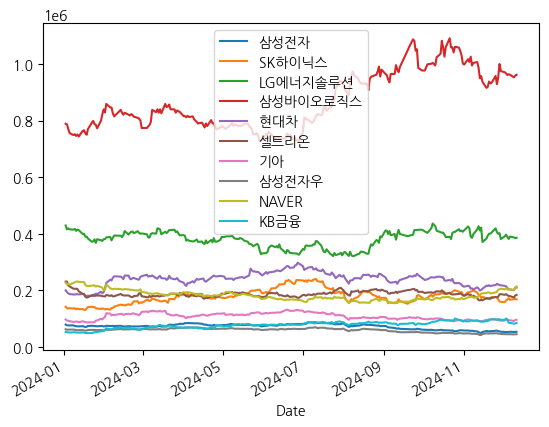

In [35]:
df.plot()

- 2개의 y축 그래프

<Axes: xlabel='Date'>

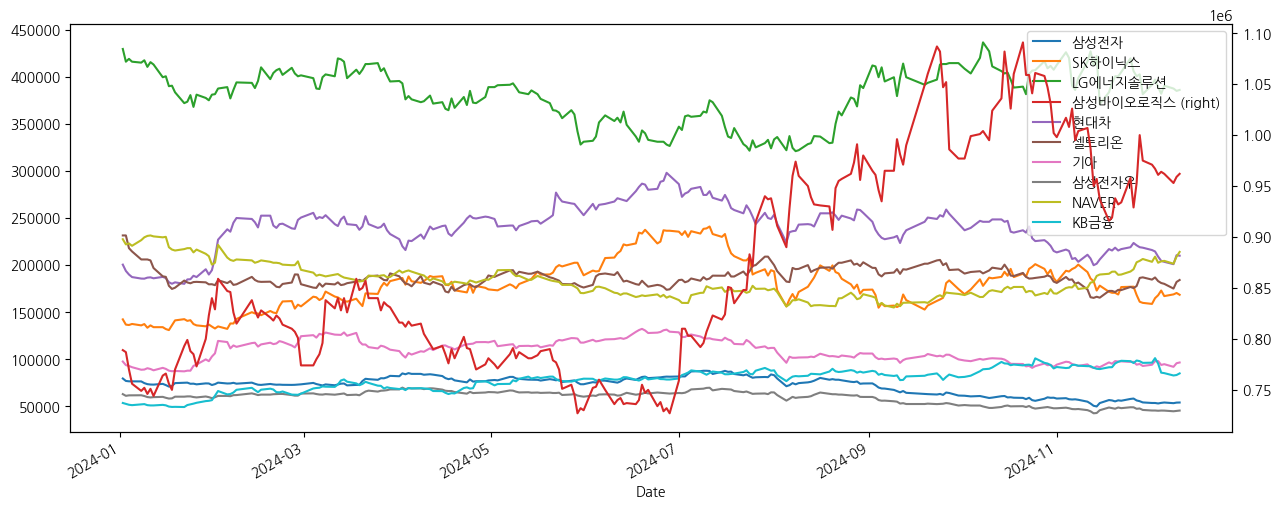

In [37]:
df.plot(figsize=(15,6), secondary_y='삼성바이오로직스')

<Axes: xlabel='Date'>

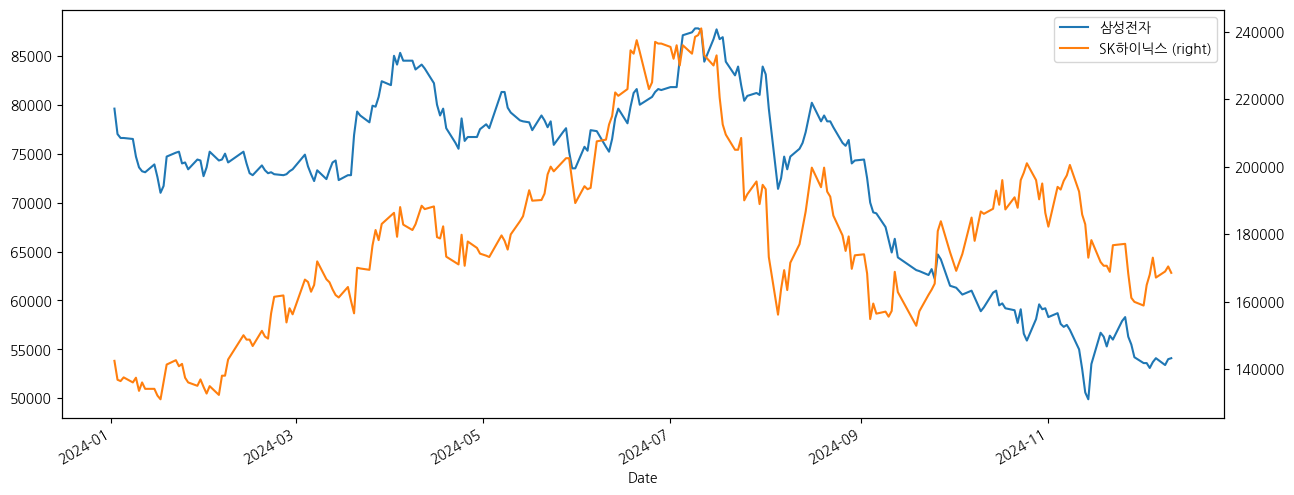

In [36]:
# 2개의 y축 그래프
df[['삼성전자','SK하이닉스']].plot(figsize=(15,6), secondary_y='SK하이닉스')

### 국내 시가총액 상위 10종목의 2024년도 수익률 비교하기

In [38]:
fdr.DataReader('005930','2024')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-01-02,78200,79800,78200,79600,17142847,0.01
2024-01-03,78500,78800,77000,77000,21753644,-0.03
2024-01-04,76100,77300,76100,76600,15324439,-0.01
2024-01-05,76700,77100,76400,76600,11304316,0.00
2024-01-08,77000,77500,76400,76500,11088724,-0.00
...,...,...,...,...,...,...
2024-12-05,53200,54400,53200,53700,23588277,0.01
2024-12-06,53900,54400,52700,54100,22861874,0.01
2024-12-09,53500,54600,53200,53400,26227680,-0.01


In [185]:
df['삼성전자']

Date
2024-01-02    79600
2024-01-03    77000
2024-01-04    76600
2024-01-05    76600
2024-01-08    76500
              ...  
2024-12-04    53100
2024-12-05    53700
2024-12-06    54100
2024-12-09    53400
2024-12-10    54000
Name: 삼성전자, Length: 231, dtype: int64

In [186]:
# 일자별 종가 / 수익율 계산 시작일 (매수일 ?) 
df['삼성전자'] / df['삼성전자'].iloc[0] - 1

Date
2024-01-02    0.00
2024-01-03   -0.03
2024-01-04   -0.04
2024-01-05   -0.04
2024-01-08   -0.04
              ... 
2024-12-04   -0.33
2024-12-05   -0.33
2024-12-06   -0.32
2024-12-09   -0.33
2024-12-10   -0.32
Name: 삼성전자, Length: 231, dtype: float64

In [39]:
# 시총 상위 10개종목의 2024년도 일자별 수익율 (2024-01-02 매수 기준)
df / df.iloc[0] - 1

,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,삼성전자우,NAVER,KB금융
Date,,,,,,,,,,
2024-01-02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2024-01-03,-0.03,-0.04,-0.03,-0.00,-0.03,0.00,-0.04,-0.03,-0.02,-0.02
2024-01-04,-0.04,-0.04,-0.02,-0.02,-0.05,-0.06,-0.05,-0.02,-0.02,-0.04
2024-01-05,-0.04,-0.03,-0.03,-0.04,-0.07,-0.07,-0.06,-0.02,-0.03,-0.04
2024-01-08,-0.04,-0.04,-0.03,-0.05,-0.07,-0.11,-0.09,-0.02,-0.00,-0.03
...,...,...,...,...,...,...,...,...,...,...
2024-12-05,-0.33,0.21,-0.11,0.22,0.02,-0.22,-0.04,-0.28,-0.10,0.60
2024-12-06,-0.32,0.17,-0.09,0.22,0.01,-0.22,-0.03,-0.28,-0.10,0.59
2024-12-09,-0.33,0.19,-0.10,0.21,0.00,-0.24,-0.06,-0.29,-0.11,0.54


In [40]:
# 2024년 1월 2일 기준 현시점 시총 상위10개 종목의 수익률
((df / df.iloc[0] - 1).iloc[-1].sort_values(ascending=False)*100).round(2) 

KB금융        58.58
삼성바이오로직스    21.93
SK하이닉스      18.33
현대차          4.74
기아          -1.02
NAVER       -5.93
LG에너지솔루션   -10.13
셀트리온       -20.43
삼성전자우      -27.70
삼성전자       -32.04
Name: 2024-12-11 00:00:00, dtype: float64

In [41]:
tmp = (df / df.iloc[0] - 1).iloc[-1].sort_values(ascending=False)

In [42]:
tmp.map(lambda x : f'{(x * 100) : .2f}%')

KB금융         58.58%
삼성바이오로직스     21.93%
SK하이닉스       18.33%
현대차           4.74%
기아           -1.02%
NAVER        -5.93%
LG에너지솔루션    -10.13%
셀트리온        -20.43%
삼성전자우       -27.70%
삼성전자        -32.04%
Name: 2024-12-11 00:00:00, dtype: object

In [ ]:
# pd.options.display.float_format : pandas 라이브러리에서 출력되는 부동소수점 숫자의 형식을 설정하는 옵션
# pd.options.display.float_format = '{:,.2f}'.format

종목, 매수일, 매도일 => 수익율, 수익금액

In [43]:
tmp2 = df / df.iloc[0] - 1

<Axes: xlabel='Date'>

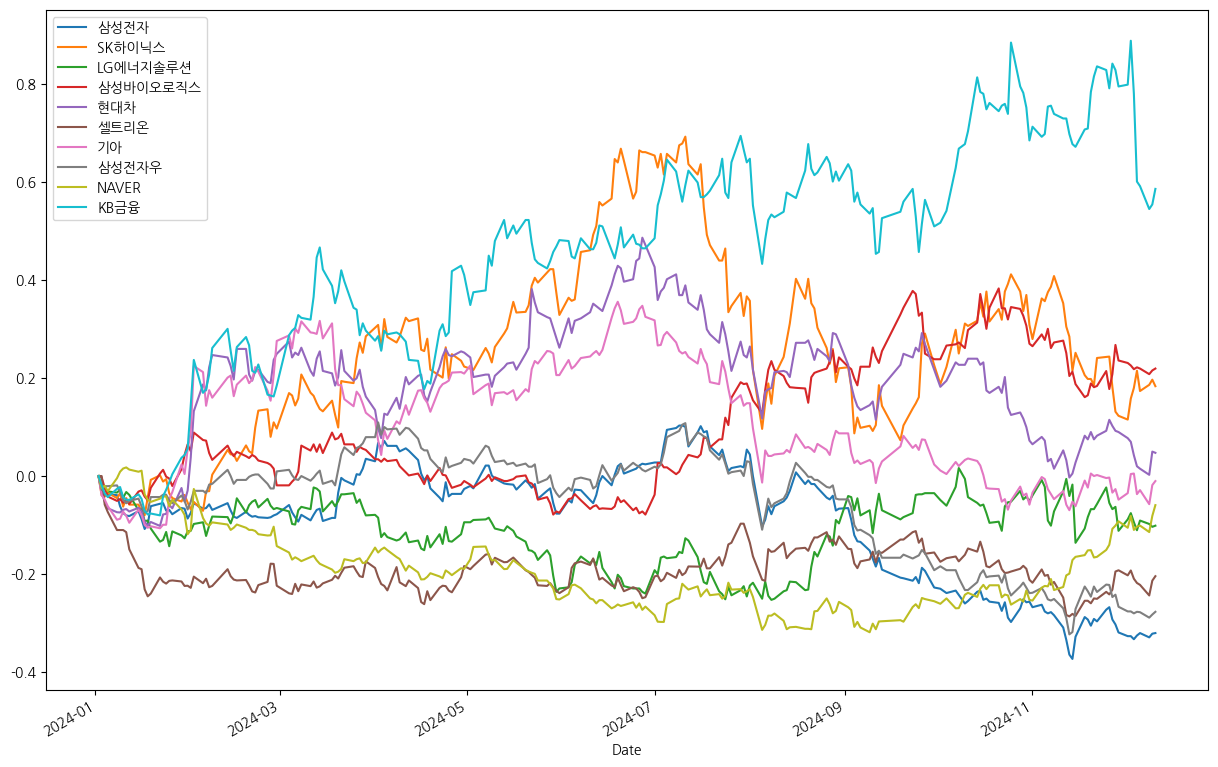

In [44]:
tmp2.plot(figsize=(15,10))

<Axes: xlabel='Date'>

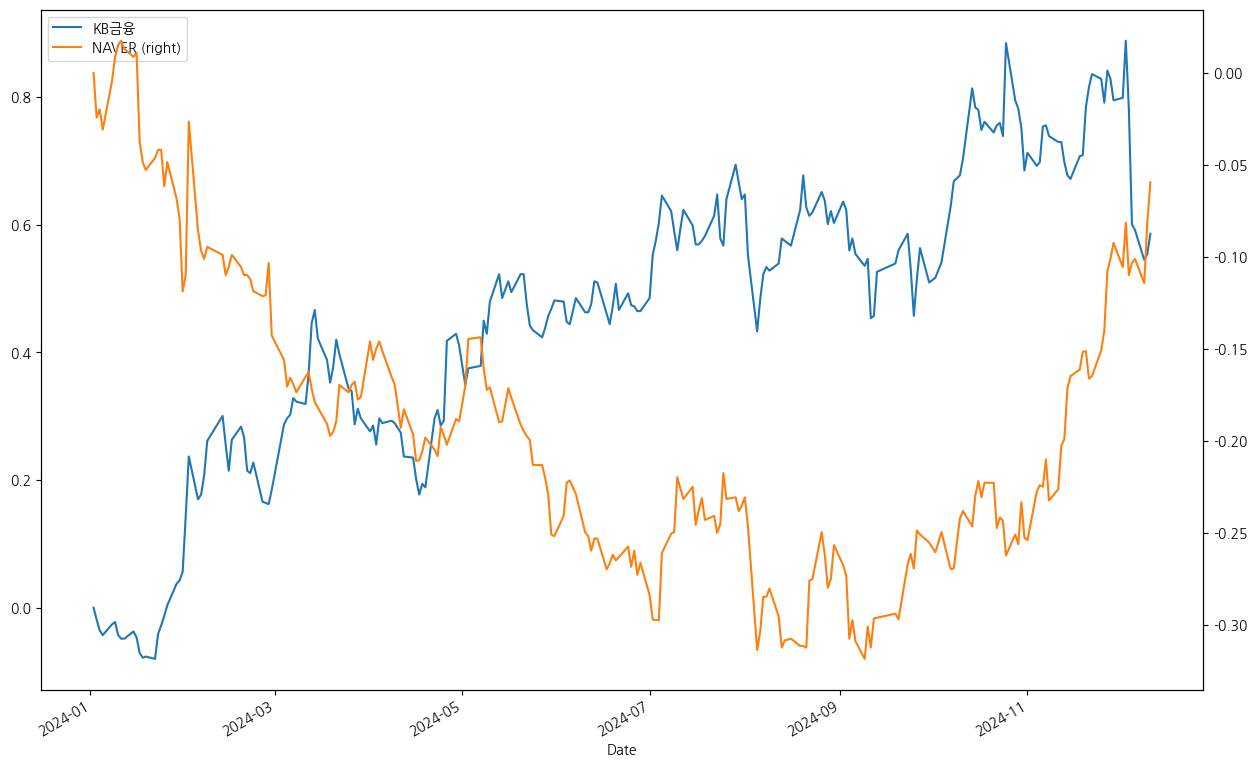

In [45]:
tmp2[['KB금융','NAVER']].plot(figsize=(15,10), secondary_y='NAVER')

<Axes: xlabel='Date'>

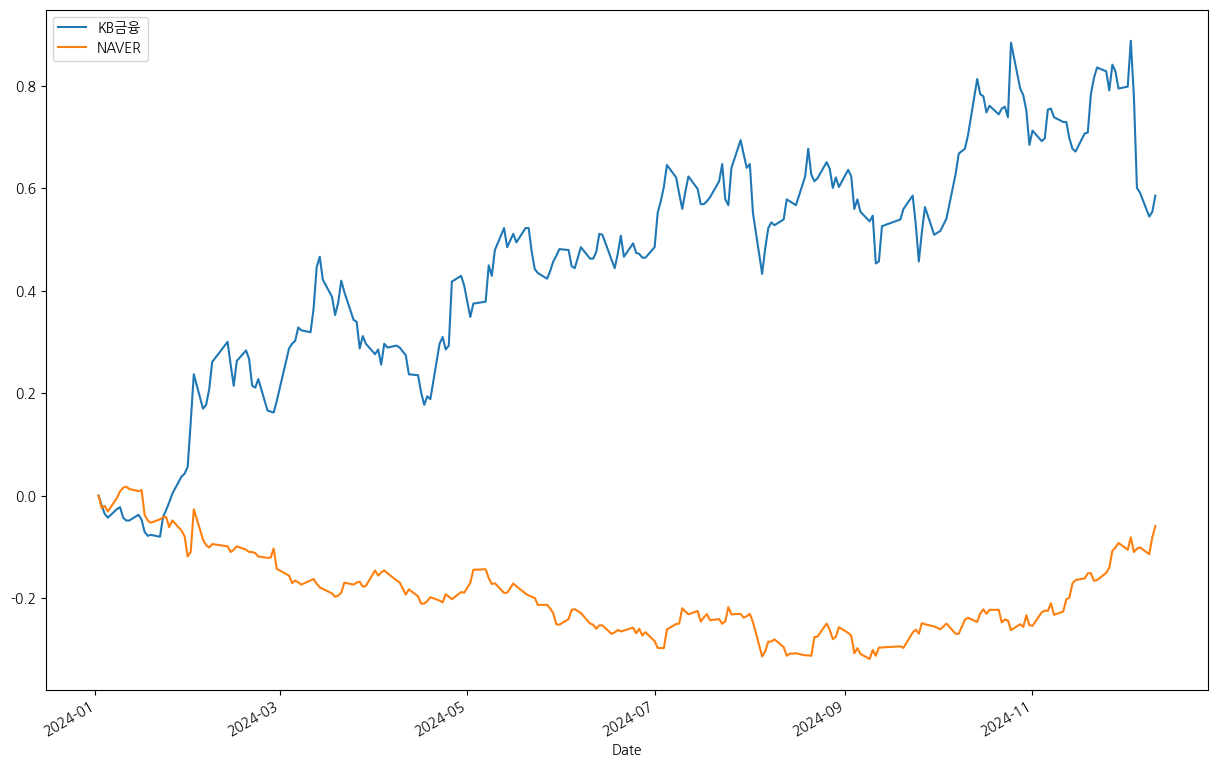

In [46]:
tmp2[['KB금융','NAVER']].plot(figsize=(15,10))

<Axes: xlabel='Date'>

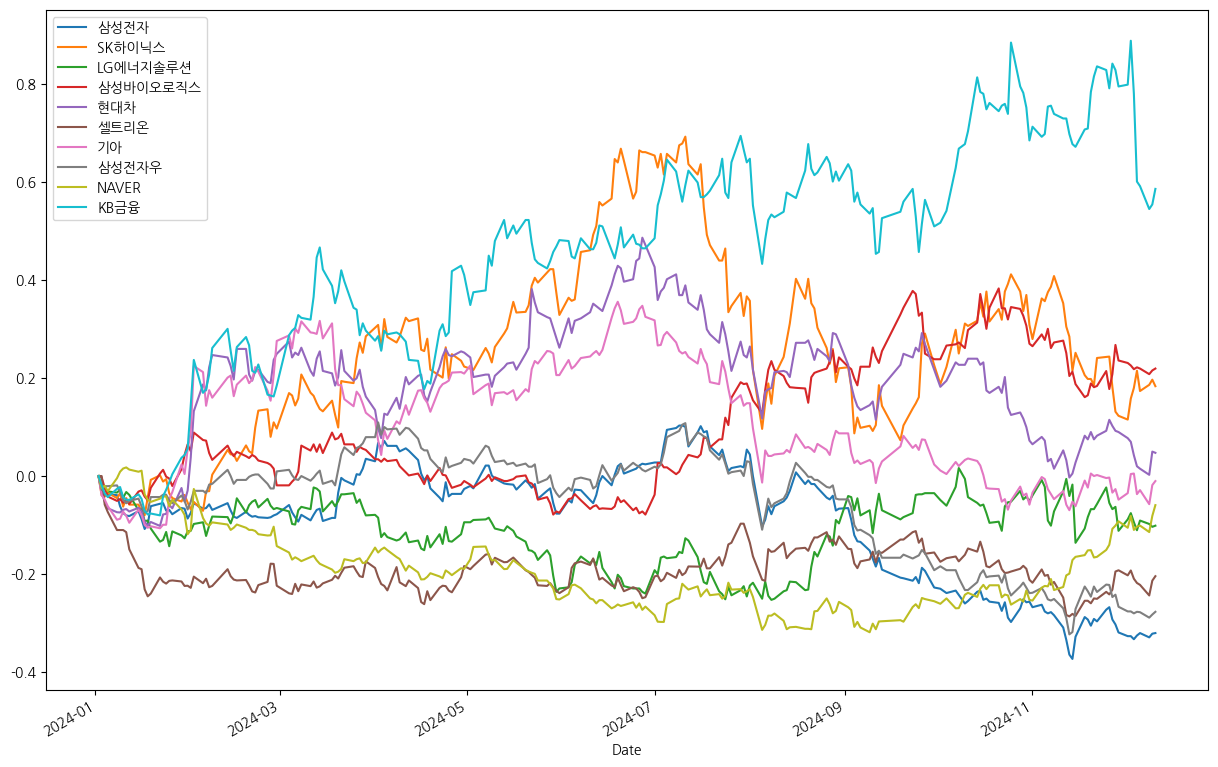

In [47]:
tmp2.plot(figsize=(15,10))